In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [2]:
n = np.max(data['to'])
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = 1 #+=1

In [3]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

In [42]:
in_degree = np.mean(list(G.in_degree().values()))
out_degree = np.mean(list(G.out_degree().values()))
print('In  degree', in_degree)
print('Out degree', out_degree)
assert in_degree == out_degree
total_degree = G.in_degree()
mean_degree = np.mean(list(total_degree.values()))
p = mean_degree/(n-1)
print("Expected in or out degree: {}".format(mean_degree))
print("n: {}".format(n))
print("p: {}".format(p))

#Generating the random graphs
erdos = nx.erdos_renyi_graph(n,p,directed=True)
barabasi = nx.barabasi_albert_graph(n, np.int(in_degree))
watts = nx.watts_strogatz_graph(n, np.int(in_degree), 1)

In  degree 2.75899457861
Out degree 2.75899457861
Expected in or out degree: 2.7589945786101526
n: 2029
p: 0.0013604509756460319


Email Graph


C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


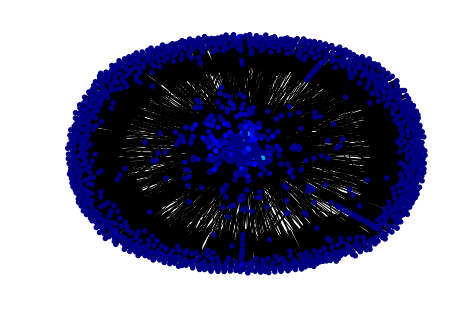

A Random Graph generated with Erdos-Renyi


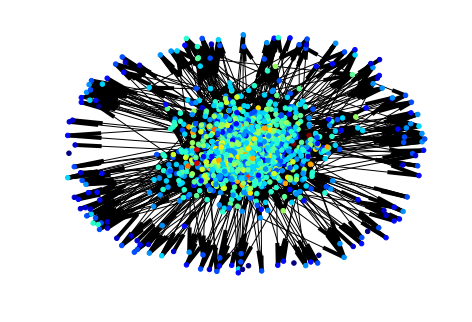

A Random Graph generated with Barabasi-Albert


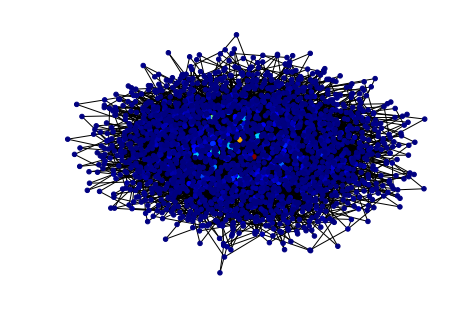

A Random Graph generated with Watts-Strogratz


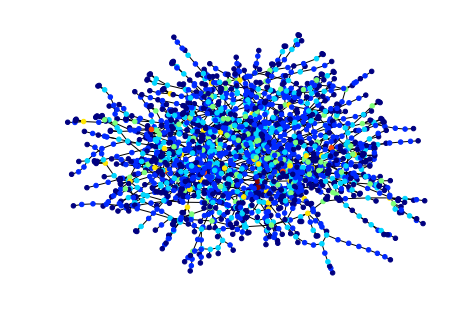

In [43]:
def draw(G):
    pos = nx.spring_layout(G)
    degree = G.degree()
    nodes = G.nodes()
    n_color = np.asarray([degree[n] for n in nodes])
    nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
    plt.show()
print('Email Graph')
draw(G)
print('A Random Graph generated with Erdos-Renyi')
draw(erdos)
print('A Random Graph generated with Barabasi-Albert')
draw(barabasi)
print('A Random Graph generated with Watts-Strogratz')
draw(watts)

# Clustering

In [44]:
H = G.to_undirected()
C_X = nx.average_clustering(H)
erdos_ = erdos.to_undirected()
C_erdos = nx.average_clustering(erdos_)
C_barabasi = nx.average_clustering(barabasi)
C_watts = nx.average_clustering(watts)
print("Clustering: ")
print("Email graph: {}".format(C_X))
print("Erdos-Renyi graph: {}".format(C_erdos))
print("Barabasi-Albert graph: {}".format(C_barabasi))
print("Watts-Strogatz graph: {}".format(C_watts))

Clustering: 
Email graph: 0.1948777450829442
Erdos-Renyi graph: 0.0021285515864126006
Barabasi-Albert graph: 0.01502937710650963
Watts-Strogatz graph: 0.0007064235255462461


# Longest shortest path

In [46]:
H = G.to_undirected()
H_max = max(nx.connected_component_subgraphs(H), key=len)
L_X = nx.average_shortest_path_length(H_max)

erdos_ = erdos.to_undirected()
erdos_max = max(nx.connected_component_subgraphs(erdos_), key=len)
L_erdos = nx.average_shortest_path_length(erdos_max)
L_barabasi = nx.average_shortest_path_length(barabasi)
watts_max = max(nx.connected_component_subgraphs(watts), key=len)
L_watts = nx.average_shortest_path_length(watts_max)
print("Average shortest path: ")
print("Email graph: {}".format(L_X))
print("Erdos-Renyi graph: {}".format(L_erdos))
print("Barabasi-Albert graph: {}".format(L_barabasi))
print("Watts-Strogatz graph: {}".format(L_watts))

Diameter: 
Email graph: 3.369467930254886
Erdos-Renyi graph: 4.683314808751433
Barabasi-Albert graph: 4.357012665463209
Watts-Strogatz graph: 31.921132921833582
